# This notebook compares if there are sequnce convergence between human and mouse up-regulated TEs 
- if ( human SER up + mouse TJP2 KO ) has higher sequence similarity than ( human AD + mouse WT)
- use combined mouse and human TE randomly selected sequences as control

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
from matplotlib.patches import Patch

In [3]:
import sequence_comparison as seqComp

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [15]:
import time

## calculate similarity scores for the mouse-human combined fastas

In [6]:
fnames = os.listdir("./sequence_similarity_input/concatenated_fasta/")
fnames  =pd.Series( fnames)
fnames.sort_values( inplace= True)

In [7]:
fnames

6     mh_resampledSquire_rand10_1.fasta
0     mh_resampledSquire_rand10_2.fasta
10    mh_resampledSquire_rand10_3.fasta
11    mh_resampledSquire_rand20_1.fasta
1     mh_resampledSquire_rand20_2.fasta
4     mh_resampledSquire_rand20_3.fasta
9     mh_resampledSquire_rand50_1.fasta
2     mh_resampledSquire_rand50_2.fasta
13    mh_resampledSquire_rand50_3.fasta
7         mh_squire_mut_last50_df.fasta
12         mh_squire_mut_top10_df.fasta
5          mh_squire_mut_top20_df.fasta
3          mh_squire_mut_top50_df.fasta
8               mh_tcps_ad_up_all.fasta
dtype: object

In [8]:
num_elements = [ 10, 10, 10, 20, 20, 20, 50, 50, 50, 50, 10, 20, 50, 19 ]
assert( len( num_elements) == len( fnames) )

In [10]:
f_ind = [ f"rand{n}_{r}" for n in [10, 20, 50] for r in [1,2,3] ]

In [12]:
f_ind = f_ind + [ 'mut_ser_last50', 'mut_ser_top10', 'mut_ser_top20', 'mut_ser_top50' , 'wt_ad_10']

In [13]:
assert( len( num_elements) == len( f_ind) )

In [16]:
input_dir = './sequence_similarity_input/concatenated_fasta/'

for f in fnames:
    print( f'Processing {f}')
    TIME_S = time.time()
    seqComp.process_group(input_dir + f, out_dir="sequence_similarity_results", n_jobs=4,plot_heatmap=False )
    TIME_E = time.time()
    TOTAL_TIME = (TIME_E - TIME_S)/60
    print( f"Time used: {TOTAL_TIME:.1f} min" )

Processing mh_resampledSquire_rand10_1.fasta
Loaded 20 sequences from ./sequence_similarity_input/concatenated_fasta/mh_resampledSquire_rand10_1.fasta
Average identity: 31.61% ± 17.94%
Time used: 0.1 min
Processing mh_resampledSquire_rand10_2.fasta
Loaded 20 sequences from ./sequence_similarity_input/concatenated_fasta/mh_resampledSquire_rand10_2.fasta
Average identity: 28.80% ± 19.58%
Time used: 0.1 min
Processing mh_resampledSquire_rand10_3.fasta
Loaded 20 sequences from ./sequence_similarity_input/concatenated_fasta/mh_resampledSquire_rand10_3.fasta
Average identity: 28.39% ± 19.09%
Time used: 0.1 min
Processing mh_resampledSquire_rand20_1.fasta
Loaded 40 sequences from ./sequence_similarity_input/concatenated_fasta/mh_resampledSquire_rand20_1.fasta
Average identity: 26.88% ± 19.44%
Time used: 0.5 min
Processing mh_resampledSquire_rand20_2.fasta
Loaded 40 sequences from ./sequence_similarity_input/concatenated_fasta/mh_resampledSquire_rand20_2.fasta
Average identity: 29.76% ± 19.36%

## make summary df 

In [17]:
score_files =pd.Series( os.listdir("./sequence_similarity_results/") )
score_files = score_files[score_files.str.startswith("mh")  ]

In [18]:
score_files.sort_values( inplace = True )
score_files

9     mh_resampledSquire_rand10_1_pairwise_identity.csv
19    mh_resampledSquire_rand10_2_pairwise_identity.csv
29    mh_resampledSquire_rand10_3_pairwise_identity.csv
2     mh_resampledSquire_rand20_1_pairwise_identity.csv
18    mh_resampledSquire_rand20_2_pairwise_identity.csv
41    mh_resampledSquire_rand20_3_pairwise_identity.csv
7     mh_resampledSquire_rand50_1_pairwise_identity.csv
4     mh_resampledSquire_rand50_2_pairwise_identity.csv
12    mh_resampledSquire_rand50_3_pairwise_identity.csv
35        mh_squire_mut_last50_df_pairwise_identity.csv
32         mh_squire_mut_top10_df_pairwise_identity.csv
50         mh_squire_mut_top20_df_pairwise_identity.csv
20         mh_squire_mut_top50_df_pairwise_identity.csv
31              mh_tcps_ad_up_all_pairwise_identity.csv
dtype: object

In [19]:
num_elements

[10, 10, 10, 20, 20, 20, 50, 50, 50, 50, 10, 20, 50, 19]

In [20]:
f_ind

['rand10_1',
 'rand10_2',
 'rand10_3',
 'rand20_1',
 'rand20_2',
 'rand20_3',
 'rand50_1',
 'rand50_2',
 'rand50_3',
 'mut_ser_last50',
 'mut_ser_top10',
 'mut_ser_top20',
 'mut_ser_top50',
 'wt_ad_10']

In [21]:
summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
df_ls = []

for i,tf in enumerate( score_files):
    # get data meta information
    f_id = f_ind[i]
    num = int( num_elements[i] )
    
    # load df
    df = pd.read_csv("./sequence_similarity_results/" + tf, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    summary_df[ f_id ] = [ avg_score, std_score, num ]
    df_ls.append( df )
    
    
    

In [19]:
#df_ls[0]

In [22]:
summary_df

,rand10_1,rand10_2,rand10_3,rand20_1,rand20_2,rand20_3,rand50_1,rand50_2,rand50_3,mut_ser_last50,mut_ser_top10,mut_ser_top20,mut_ser_top50,wt_ad_10
avg_pctIdentity,31.611626,28.797935,28.386119,26.877344,29.756147,27.648782,28.393928,29.294346,30.006535,29.659948,26.246414,32.116095,30.168912,28.378882
std_pctIdentity,17.984393,19.631838,19.141579,19.453937,19.367504,19.250621,19.125763,19.361867,18.521960,19.157885,20.605537,22.080023,20.893336,19.152495
num_element,10.000000,10.000000,10.000000,20.000000,20.000000,20.000000,50.000000,50.000000,50.000000,50.000000,10.000000,20.000000,50.000000,19.000000


In [27]:
conditions = []
for c in summary_df.columns:
    if( c.startswith( 'rand')):
        conditions.append( 'control')
    else:
        cond = "_".join( c.split("_")[0:2] )
        conditions.append( cond) 

In [28]:
conditions

['control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'mut_ser',
 'mut_ser',
 'mut_ser',
 'mut_ser',
 'wt_ad']

In [29]:
summary_df.loc['condition'] = conditions

In [30]:
summary_df = summary_df.T

In [31]:
summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_1,31.611626,17.984393,10.0,control
rand10_2,28.797935,19.631838,10.0,control
rand10_3,28.386119,19.141579,10.0,control
rand20_1,26.877344,19.453937,20.0,control
rand20_2,29.756147,19.367504,20.0,control


In [34]:
summary_df.sort_values( by = ['condition', 'num_element'], ascending= True , inplace= True )

In [35]:
summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_1,31.611626,17.984393,10.0,control
rand10_2,28.797935,19.631838,10.0,control
rand10_3,28.386119,19.141579,10.0,control
rand20_1,26.877344,19.453937,20.0,control
rand20_2,29.756147,19.367504,20.0,control


## plot summary df

In [36]:
condition_colors = {
    'control': 'gray',
    'mut_ser': 'salmon',
    'wt_ad':'cornflowerblue'
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


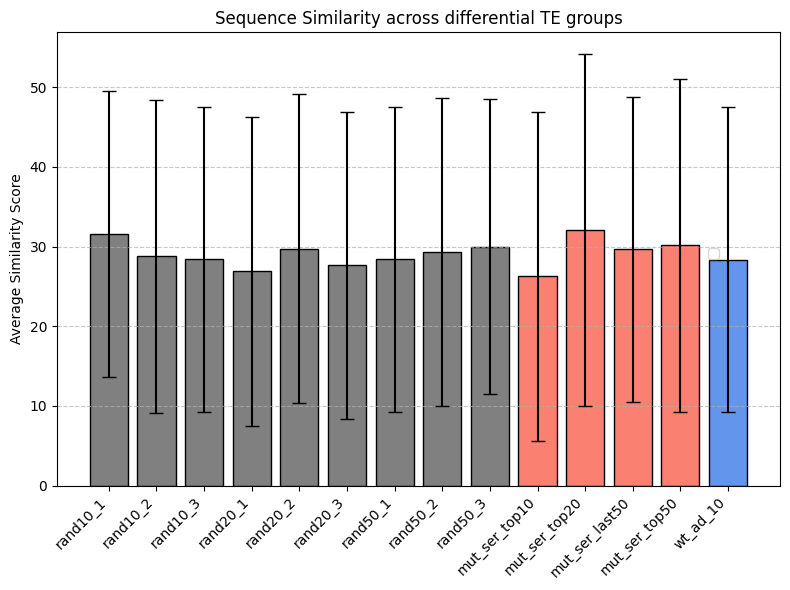

In [45]:
bar_colors = [condition_colors[cond] for cond in summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(summary_df.index, summary_df['avg_pctIdentity'] , yerr=summary_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend( loc = [0.9,0.5])

# Show plot
plt.tight_layout()
plt.show()


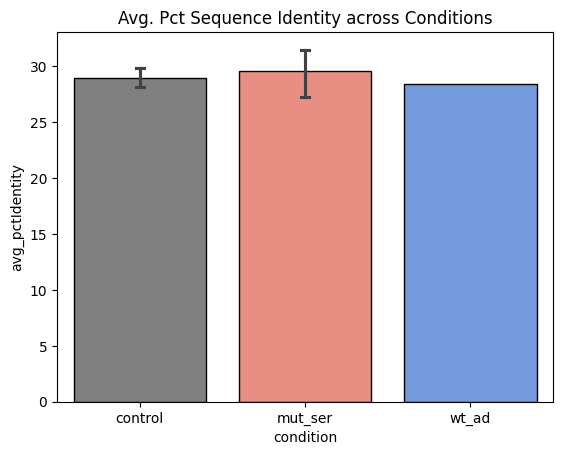

In [46]:
sn.barplot( summary_df, y ='avg_pctIdentity' , x = 'condition' , hue= 'condition', palette= condition_colors, edgecolor = 'black', capsize = 0.05 )
plt.title( 'Avg. Pct Sequence Identity across Conditions')
plt.show()

<Axes: xlabel='condition', ylabel='avg_pctIdentity'>

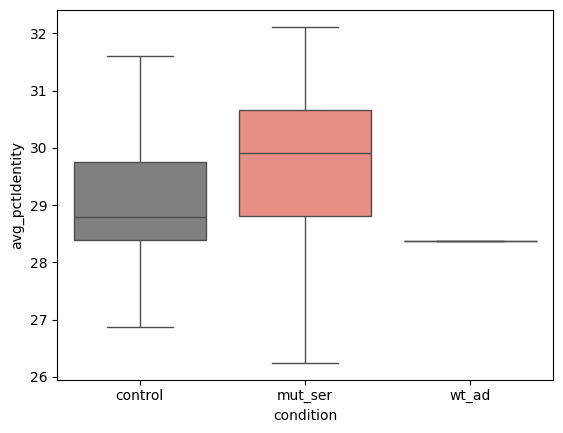

In [47]:
sn.boxplot( summary_df, y ='avg_pctIdentity' , x = 'condition' , hue= 'condition', palette= condition_colors )

## calculate p-values

In [51]:
from scipy import stats

ctrl = summary_df['avg_pctIdentity'][summary_df['condition'] == 'control']
mut = summary_df['avg_pctIdentity'][summary_df['condition'] == 'mut_ser']
# Assuming equal variances (default)
t_statistic, p_value = stats.ttest_ind(list(mut), list( ctrl) )

In [52]:
[t_statistic, p_value]

[0.5465122768196964, 0.5956252240411097]

## save data

In [3]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col= 0 )
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'squire_tjp2_total_seq_similarity_summary_df.csv'],
      dtype='object')

In [5]:
summary_df.to_csv("./mouse_human_combined_similarity_suammry_df.csv", header= True, index = True )

In [6]:
logi['mouse_human_combined_similarity_suammry_df.csv'] = ['7' , 'NA', 'sequence similarity summary df when combining (mouse TJP2 KO + human SER) vs ( mouse WT and human AD) vs control ( randomly selected TEs from combined TE list) ']

In [7]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True, index = True )